In [15]:
import torch
import matplotlib.pyplot as plt

In [12]:
xs = torch.randn(10,10)
xs

tensor([[ 2.3400e-01, -9.3302e-06, -4.2286e-01,  3.6554e-01,  1.6587e+00,
         -2.8150e+00, -6.6352e-01,  3.5275e-01, -5.4402e-01,  6.5585e-02],
        [ 7.5185e-01, -7.2613e-01,  4.9152e-01,  8.6459e-01, -1.3327e-01,
          6.1344e-01, -2.9750e-01, -3.5416e-01, -8.6179e-01,  1.4296e+00],
        [ 9.1887e-01,  7.5251e-01, -1.6050e+00,  6.7782e-01,  1.5495e-01,
          1.9351e+00, -4.7876e-01,  1.7991e-01,  1.7565e-01,  4.7977e-01],
        [-2.2689e-01,  3.9490e-01,  5.6899e-01,  3.0950e-01, -1.3099e-02,
          8.7830e-01,  1.0586e+00,  4.2979e-02, -4.3427e-01, -3.4613e-01],
        [ 1.3406e+00,  7.4756e-01, -6.9644e-01,  5.0310e-01,  1.1961e+00,
         -6.4175e-01,  7.2458e-01,  5.7657e-01, -4.3091e-01,  4.3682e-02],
        [ 8.0639e-01, -1.0498e-01, -2.7982e-01, -8.5697e-01,  7.5666e-01,
         -1.1775e+00,  1.4007e+00, -7.6038e-01, -9.3633e-02,  1.7936e+00],
        [-1.2071e-01, -7.7077e-01,  2.1854e-01,  3.8258e-01, -3.8291e-01,
          7.0375e-01,  1.0906e+0

In [13]:
ys = torch.randn(10,1)
print(ys)

tensor([[-0.3661],
        [ 0.3927],
        [ 0.5643],
        [-1.1154],
        [-0.3950],
        [-0.5183],
        [-0.0341],
        [ 0.0058],
        [ 0.3070],
        [-0.5173]])


In [14]:
xs @ ys

tensor([[-0.1044],
        [-2.5087],
        [-2.9437],
        [-0.2261],
        [-1.4674],
        [-0.2357],
        [-1.0338],
        [ 1.9931],
        [-2.0169],
        [-0.4805]])

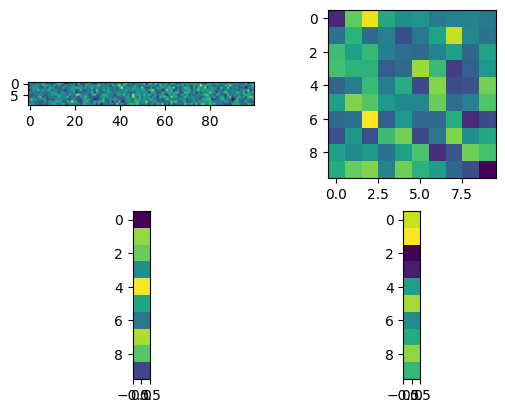

In [24]:
plt.subplot(2, 2, 1)
plt.imshow(torch.randn(10,100))
plt.subplot(2, 2, 2)
plt.imshow(torch.randn(10,10))
plt.subplot(2, 2, 3)
plt.imshow(torch.randn(10,100) @ torch.randn(100,1))
plt.subplot(2, 2, 4)
plt.imshow(torch.randn(10,10) @ torch.randn(10,1))

In [25]:
torch.randn(10,100) @ torch.randn(100,1)

tensor([[  5.3554],
        [  6.2284],
        [ -3.0890],
        [ 10.3851],
        [-14.1174],
        [ -5.9598],
        [ -7.5799],
        [-10.1032],
        [-16.8027],
        [  3.9003]])

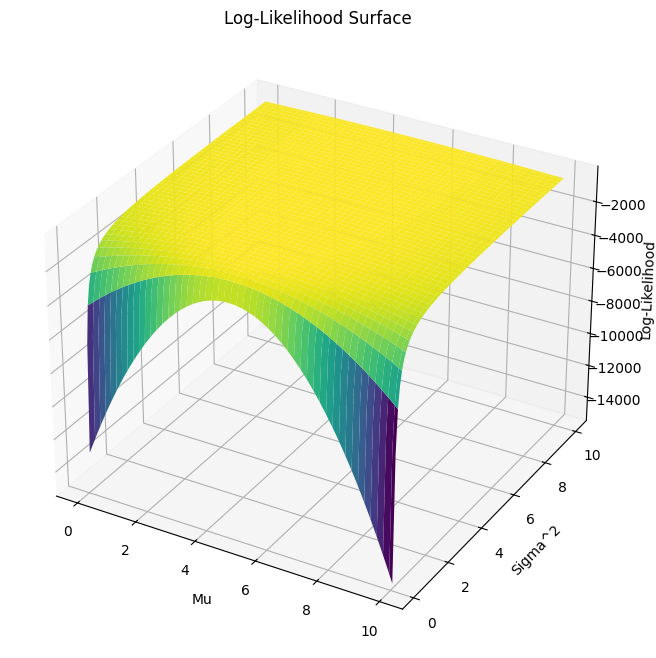

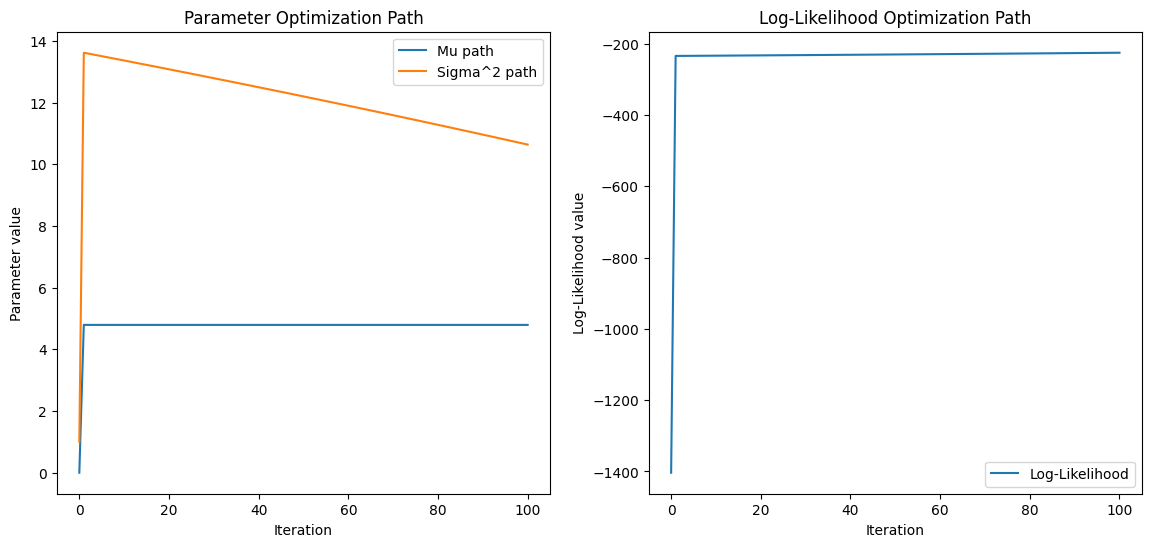

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate synthetic data
np.random.seed(42)
true_mu = 5
true_sigma = 2
data = np.random.normal(true_mu, true_sigma, 100)

# Step 2: Define the log-likelihood function for a Gaussian distribution
def log_likelihood(mu, sigma2, data):
    n = len(data)
    ll = -n/2 * np.log(2 * np.pi * sigma2) - (1 / (2 * sigma2)) * np.sum((data - mu) ** 2)
    return ll

# Step 3: Compute log-likelihood for different values of mu and sigma2
mu_values = np.linspace(0, 10, 100)
sigma2_values = np.linspace(0.1, 10, 100)
log_likelihood_values = np.zeros((len(mu_values), len(sigma2_values)))

for i, mu in enumerate(mu_values):
    for j, sigma2 in enumerate(sigma2_values):
        log_likelihood_values[i, j] = log_likelihood(mu, sigma2, data)

# Step 4: Plot the log-likelihood function
mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(mu_grid, sigma2_grid, log_likelihood_values.T, cmap='viridis')
ax.set_xlabel('Mu')
ax.set_ylabel('Sigma^2')
ax.set_zlabel('Log-Likelihood')
ax.set_title('Log-Likelihood Surface')
plt.show()

# Step 5: Gradient ascent to optimize the log-likelihood function
def gradient_ascent(data, mu_start, sigma2_start, learning_rate=0.01, num_steps=100):
    mu = mu_start
    sigma2 = sigma2_start
    mu_path = [mu]
    sigma2_path = [sigma2]
    ll_path = [log_likelihood(mu, sigma2, data)]
    
    for _ in range(num_steps):
        grad_mu = np.sum((data - mu)) / sigma2
        grad_sigma2 = -len(data) / (2 * sigma2) + np.sum((data - mu) ** 2) / (2 * sigma2 ** 2)
        
        mu += learning_rate * grad_mu
        sigma2 += learning_rate * grad_sigma2
        
        mu_path.append(mu)
        sigma2_path.append(sigma2)
        ll_path.append(log_likelihood(mu, sigma2, data))
    
    return mu_path, sigma2_path, ll_path

# Initial guess
mu_start = 0
sigma2_start = 1

# Perform gradient ascent
mu_path, sigma2_path, ll_path = gradient_ascent(data, mu_start, sigma2_start)

# Plot optimization path
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot mu and sigma2 path
ax[0].plot(mu_path, label='Mu path')
ax[0].plot(sigma2_path, label='Sigma^2 path')
ax[0].set_title('Parameter Optimization Path')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Parameter value')
ax[0].legend()

# Plot log-likelihood path
ax[1].plot(ll_path, label='Log-Likelihood')
ax[1].set_title('Log-Likelihood Optimization Path')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Log-Likelihood value')
ax[1].legend()

plt.show()
